<a href="https://colab.research.google.com/github/dpnolan/AI/blob/master/Chollet_2e_4_1_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
import numpy as np
import tensorflow as tf
tf.__version__
'''

'\nimport numpy as np\nimport tensorflow as tf\ntf.__version__\n'

In [ ]:
'''
from tensorflow import keras
keras.__version__
'''

'2.4.0'

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
#4.1 Load IMDB dataset

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
#train_data[0]

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
#4.2 decoding review back to text
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])
decoded_review=' '.join( [ reverse_word_index.get(i-3,'?') for i in train_data[0] ] )

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
#word_index.items()

In [11]:
import numpy as np

In [12]:
#4.3 Encoding the integer sequences via one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [13]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [14]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [15]:
train_data.shape

(25000,)

In [16]:
x_train.shape

(25000, 10000)

In [17]:
x_test.shape

(25000, 10000)

In [18]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [19]:
from tensorflow import keras

In [20]:
#4.4 Model definition
model=keras.Sequential([
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])

In [21]:
#4.5 Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
#4.6 Set aside a validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [23]:
#4.7 Train the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5806 - acc: 0.7107 - val_loss: 0.3762 - val_acc: 0.8643
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3101 - acc: 0.9009 - val_loss: 0.2992 - val_acc: 0.8868
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2209 - acc: 0.9309 - val_loss: 0.2765 - val_acc: 0.8927
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1691 - acc: 0.9492 - val_loss: 0.2824 - val_acc: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1359 - acc: 0.9599 - val_loss: 0.2821 - val_acc: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1163 - acc: 0.9656 - val_loss: 0.3217 - val_acc: 0.8755
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0957 - acc: 0.9728 - val_loss: 0.3415 - val_acc: 0.8734
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0745 - a

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_dict=history.history

In [26]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [27]:
history_dict

{'acc': [0.7914666533470154,
  0.9059333205223083,
  0.9301999807357788,
  0.9453999996185303,
  0.9556666612625122,
  0.962933361530304,
  0.9718666672706604,
  0.9789999723434448,
  0.9825999736785889,
  0.986133337020874,
  0.9889333248138428,
  0.9926000237464905,
  0.9938666820526123,
  0.9958000183105469,
  0.9973999857902527,
  0.9975333213806152,
  0.9983999729156494,
  0.9995333552360535,
  0.9983999729156494,
  0.9998666644096375],
 'loss': [0.49910426139831543,
  0.29201194643974304,
  0.2186966836452484,
  0.1713860034942627,
  0.14055801928043365,
  0.11844728887081146,
  0.09632699191570282,
  0.07860412448644638,
  0.06522561609745026,
  0.05401552841067314,
  0.04441903531551361,
  0.03524717316031456,
  0.029406283050775528,
  0.02321138046681881,
  0.017592979595065117,
  0.01537182554602623,
  0.012151909060776234,
  0.008875795640051365,
  0.008615471422672272,
  0.004001343157142401],
 'val_acc': [0.864300012588501,
  0.8867999911308289,
  0.8927000164985657,
  0.8

In [28]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs=range(1, len(loss_values)+1)



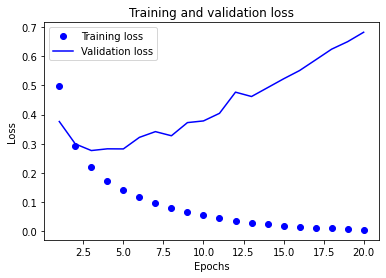

In [29]:
#4.8 Plot training and validation sets loss

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

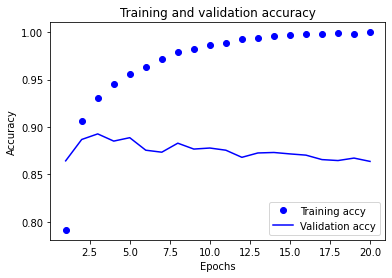

In [30]:
#4.9 Plot training and validation sets accuracy
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training accy')
plt.plot(epochs, val_acc, 'b', label='Validation accy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
#4.10 Retraining from scratch
model=keras.Sequential([
                        keras.layers.Dense(16,activation='relu'),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.5519 - accuracy: 0.7521
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2741 - accuracy: 0.9101
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.1991 - accuracy: 0.9334
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2961 - accuracy: 0.8816


In [32]:
results

[0.2960701584815979, 0.8815600275993347]

In [33]:
model.predict(x_test)

array([[0.14757124],
       [0.9996575 ],
       [0.83520365],
       ...,
       [0.11087412],
       [0.05451974],
       [0.4892571 ]], dtype=float32)

In [57]:
#4.1.6 further experiments

model=keras.Sequential([
                        keras.layers.Dense(16,activation='relu'),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val) )


Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6040 - accuracy: 0.7073 - val_loss: 0.3790 - val_accuracy: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3131 - accuracy: 0.9038 - val_loss: 0.3067 - val_accuracy: 0.8818
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2130 - accuracy: 0.9328 - val_loss: 0.3022 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1599 - accuracy: 0.9491 - val_loss: 0.2868 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1266 - accuracy: 0.9584 - val_loss: 0.2988 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0932 - accuracy: 0.9745 - val_loss: 0.3203 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0861 - accuracy: 0.9724 - val_loss: 0.3571 - val_accuracy: 0.8780
Epoch 8/20
30

In [58]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs=range(1, len(loss_values)+1)

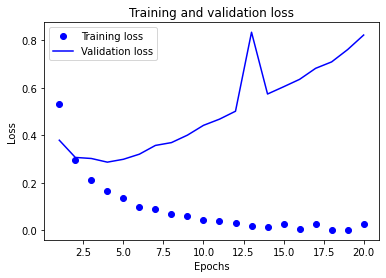

In [59]:
#4.8 Plot training and validation sets loss

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

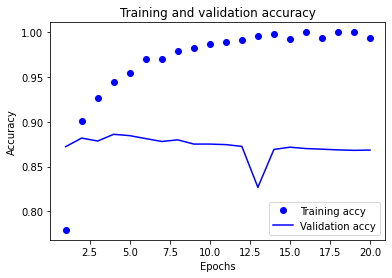

In [60]:
#4.9 Plot training and validation sets accuracy
plt.clf()
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accy')
plt.plot(epochs, val_acc, 'b', label='Validation accy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()